In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

### 목표1: Bubble Chart를 활용, 질량과 FUR 을 비교하여 양품, 불량을 시각화한다.

## 데이터 불러오기

In [6]:
df = pd.read_csv('steel_date.csv')

In [229]:
steel = df
steel.drop(columns='unnamed: 0', inplace=True)

In [7]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         720 non-null    int64  
 1   PLATE_NO           720 non-null    object 
 2   ROLLING_DATE       720 non-null    object 
 3   SCALE              720 non-null    object 
 4   SPEC               720 non-null    object 
 5   STEEL_KIND         720 non-null    object 
 6   PT_THK             720 non-null    float64
 7   PT_WDTH            720 non-null    int64  
 8   PT_LTH             720 non-null    int64  
 9   PT_WGT             720 non-null    int64  
 10  FUR_NO             720 non-null    object 
 11  FUR_NO_ROW         720 non-null    int64  
 12  FUR_HZ_TEMP        720 non-null    int64  
 13  FUR_HZ_TIME        720 non-null    int64  
 14  FUR_SZ_TEMP        720 non-null    int64  
 15  FUR_SZ_TIME        720 non-null    int64  
 16  FUR_TIME           720 non

## 데이터 전처리

### 칼럼 소문자로 변환

In [230]:
#모든 칼럼 소문자로 변환

steel.rename(str.lower, axis='columns', inplace=True)

### 고유값이 2개인 칼럼 값 치환

In [231]:
#계산이 용이하도록 고유값이 2개인 SCALE과 HSB칼럼을 0과 1로 치환

steel['scale'] = steel['scale'].replace({'양품':1, '불량':0})
steel['hsb'] = steel['hsb'].replace({'적용':1, '미적용':0})

### 중복하는 칼럼 제거

In [232]:
#값이 정확히 일치하는 두 개의 칼럼이 있어 하나를 제거해주었다.

#'FUR_SZ_TEMP', 'FUR_EXTEMP' 칼럼이 정확히 일치하는지 확인
duplicate = steel[['fur_sz_temp','fur_extemp']].assign(duplicate_lambda=lambda x: (x['fur_sz_temp'] == x['fur_extemp']))

#print(test1.to_string())        #출력해보면 두 칼럼의 모든 항목을 비교하는 표를 확인할 수 있다.
print(duplicate['duplicate_lambda'].unique())      #lamda로 추출한 값에 True만 존재하기 때문에, 정확히 일치함을 확인

steel.drop(columns='fur_extemp', inplace=True)

[ True]


### 고유값 확인

In [233]:
#PLATE_NO는 생산된 철의 중복되지 않은 고유번호임을 알 수 있다.

plt_no_nunique = steel['plate_no'].nunique()
plt_no_count = steel['plate_no'].count()
print('plate_no 고유값은 ' + str(plt_no_nunique) + '개,\n' + 
      '데이터 수는' + str(plt_no_count) + '개 입니다.')

plate_no 고유값은 720개,
데이터 수는720개 입니다.


### 일단 전부 시각화

#### SPEC별 불량률 - Stacked bar 차트

In [336]:
#데이터프레임 추출
spec_1 = pd.Series(steel['spec'].unique())
spec_2 = pd.DataFrame()

for i in spec_1:
    yes = steel[(steel['spec'] == i) & (steel['scale'] == 1)]['scale'].count()
    no = steel[(steel['spec'] == i) & (steel['scale'] == 0)]['scale'].count()
    spec_2 = pd.concat([spec_2,pd.DataFrame([i, yes, no, yes + no]).T])
    
spec_2.reset_index(drop=True)
spec_2.columns = ['spec','1','0','sum']
spec_2.sort_values(by='sum', ascending=False, inplace=True)

In [340]:
spec_2.head(3)

,spec,1,0,sum
0,JS-SM490YB,49,35,84
0,LR-A,43,11,54
0,NV-A,34,14,48


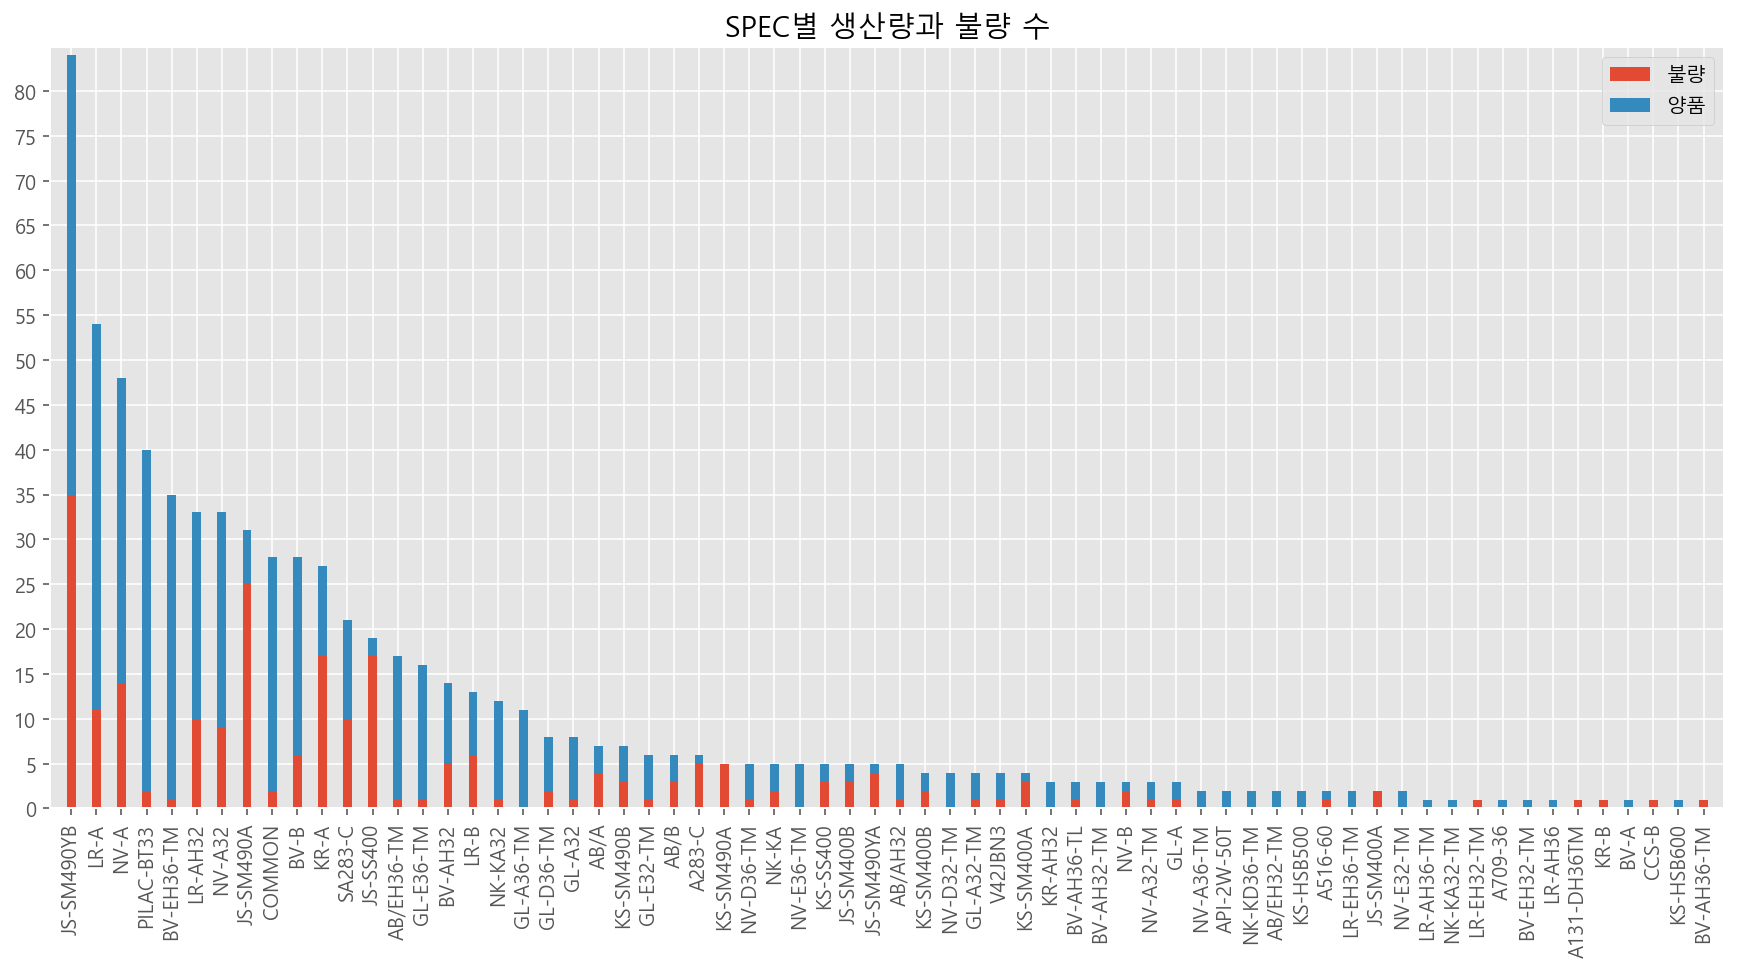

In [337]:
#Stacked Bar 차트

labels = spec_2['spec']
x1 = spec_2['0']
x2 = spec_2['1']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(labels, x1, width, label='불량')
ax.bar(labels, x2, width, bottom=x1, label='양품')
#ax.set_xticklabels(labels, rotation=45)

#ax.set_ylabel('Scores')
ax.set_title('SPEC별 생산량과 불량 수')
ax.legend()

plt.style.use('ggplot')
#plt.figure(figsize=(15,7))
#plt.bar(bc1_labels, bc1_values, width=0.7)
#plt.set_xlabel(fontsize=10)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 100, step=5))
plt.margins(0.01)
plt.grid(True, axis='y')
plt.show()

In [335]:
# spec_3 = spec_2[spec_2['sum'] >= 20]
# labels = spec_3['spec']
# values = ((spec_3['0'] / spec_3['sum']) * 100).sort_values()

# # explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig1, ax1 = plt.subplots()
# ax1.pie(values, labels=labels) 
# #         autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
# # ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

#### STEEL_KIND별 불량률 - Stacked bar 차트

In [342]:
#데이터프레임 추출
sk_1 = pd.Series(steel['steel_kind'].unique())
sk_2 = pd.DataFrame()
#steel[(steel['steel_kind'] == 'AB/EH32-TM') & (steel['scale'] == 1)]['scale'].count()
for i in sk_1:
    yes = steel[(steel['steel_kind'] == i) & (steel['scale'] == 1)]['scale'].count()
    no = steel[(steel['steel_kind'] == i) & (steel['scale'] == 0)]['scale'].count()
    sk_2 = pd.concat([sk_2,pd.DataFrame([i, yes, no, yes + no]).T])
    
sk_2.reset_index(drop=True)
sk_2.columns = ['sk_1','1','0','sum']
sk_2.sort_values(by='sum', ascending=False, inplace=True)

In [343]:
sk_2.head(3)

,sk_1,1,0,sum
0,C0,291,212,503
0,T8,90,5,95
0,T5,41,2,43


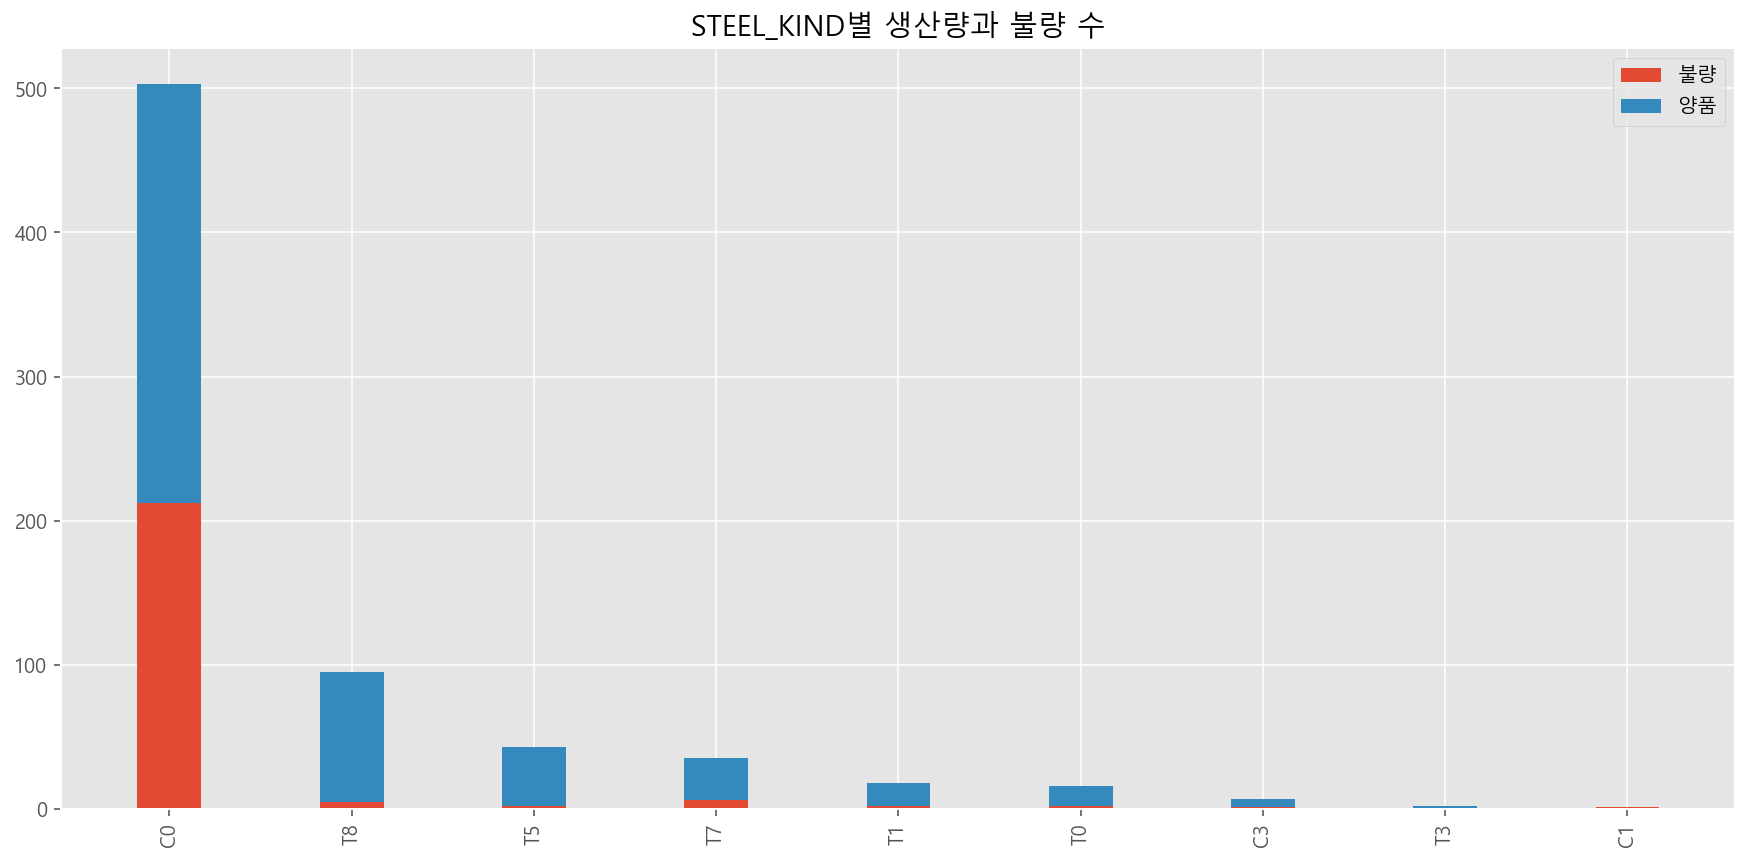

In [351]:
#Stacked Bar 차트

labels = sk_2['sk_1']
x1 = sk_2['0']
x2 = sk_2['1']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(labels, x1, width, label='불량')
ax.bar(labels, x2, width, bottom=x1, label='양품')
#ax.set_xticklabels(labels, rotation=45)

#ax.set_ylabel('Scores')
ax.set_title('STEEL_KIND별 생산량과 불량 수')
ax.legend()

plt.style.use('ggplot')
#plt.figure(figsize=(15,7))
#plt.bar(bc1_labels, bc1_values, width=0.7)
#plt.set_xlabel(fontsize=10)
plt.xticks(rotation=90)
#plt.yticks(np.arange(0, 100, step=5))
#plt.margins(0.01)
plt.grid(True, axis='y')
plt.show()

In [47]:
result = steel.groupby(['steel_kind','spec'], as_index=False).agg({'pt_thk': np.ptp, 'pt_wdth': np.ptp,
                                                   'pt_lth': np.ptp, 'pt_wgt': np.ptp
                                                   })
print(result.to_string())

   STEEL_KIND         SPEC  PT_THK  PT_WDTH  PT_LTH  PT_WGT
0          C0       A283-C    8.09      844   12163   42770
1          C0      A516-60    0.00        0       0       0
2          C0      A709-36    0.00        0       0       0
3          C0         AB/A   12.62     1193   13484   25890
4          C0      AB/AH32    3.53       43    4978   24720
5          C0         AB/B    6.07     1826   29771   53800
6          C0         BV-A    0.00        0       0       0
7          C0      BV-AH32    8.09     2488   30436   54480
8          C0         BV-B    5.06     1570   15231   70960
9          C0        CCS-B    0.00        0       0       0
10         C0         GL-A    1.01      749   14466   14140
11         C0       GL-A32    5.05      789   12175   57080
12         C0    JS-SM400A    0.00        0       0       0
13         C0    JS-SM400B    0.00        0       0       0
14         C0    JS-SM490A   37.11      925   35685   63120
15         C0   JS-SM490YA    0.00      

- SZ 가열로 온도와 가열로 추출온도가 완전히 같다 or 자료의 오류?

In [339]:
# #SPEC별 

# bc1_labels = steel['spec'].unique()
# bc1_values = steel.groupby('spec')['scale'].count().sort_values(ascending=False)

# plt.figure(figsize=(15,7))
# plt.bar(bc1_labels, bc1_values, width=0.7)
# #plt.set_xlabel(fontsize=10)
# plt.xticks(rotation=90)
# plt.yticks(np.arange(0, 100, step=5))
# plt.margins(0 .01)
# plt.grid(True, axis='y')
# plt.show()